In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [3]:
# loading the dataset to a pandas DataFrame
credit_card_data = pd.read_csv("/content/creditcard.csv")

In [4]:
credit_card_data.describe

<bound method NDFrame.describe of       Time        V1        V2        V3        V4        V5        V6  \
0        0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2        1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3        1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4        2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...    ...       ...       ...       ...       ...       ...       ...   
3968  3617  1.134592  0.252051  0.488592  0.799826 -0.264819 -0.369918   
3969  3621 -1.338671  1.080974  1.291196  0.719258  0.101320  0.053896   
3970  3622 -0.339728 -2.417449  0.975517  2.537995 -1.720361  0.863005   
3971  3623 -0.368639  0.947432  1.707755  0.932092  0.292956  0.189100   
3972  3624 -0.663445  1.162921  1.508050  0.549405  0.231377 -0.106041   

            V7        V8        V9  ...       V21       V22       V23  \
0   

In [5]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
3971,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0


In [6]:
# First 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
3971,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0
3972,3624,-0.663445,1.162921,1.508050,0.549405,0.231377,-0.106041,0.817977,-0.387026,1.488054,...,-0.420337,-0.361357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
credit_card_data.shape

(3973, 31)

In [9]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [10]:
# checking the number of missingvalues in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

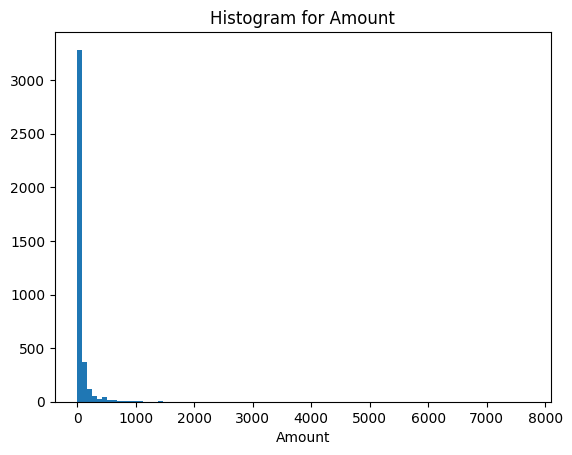

In [11]:
plt.hist(credit_card_data['Amount'],bins=90)
plt.xlabel('Amount')
plt.title('Histogram for Amount')
plt.show()

In [12]:
# distribution of legit transactions and fraudulent transactions
credit_card_data["Class"].value_counts()

0.0    3970
1.0       2
Name: Class, dtype: int64

This Dataset is highly unblanced

0 ->Normal Transaction 1 ->fraudulent transction

In [13]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [14]:
print(legit.shape)
print(fraud.shape)

(3970, 31)
(2, 31)


In [15]:
# statistical measures of the data
legit.Amount.describe()

count    3970.000000
mean       64.899597
std       213.612570
min         0.000000
25%         2.270000
50%        12.990000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [17]:
# compare the values for both transactions
credit_card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1638.828463,-0.332459,0.308935,0.837446,0.011432,-0.029468,0.053530,0.147357,-0.071642,0.056211,...,0.059567,0.010282,-0.082957,-0.058743,0.029114,0.095244,-0.012637,0.044658,0.002668,64.899597
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


In [18]:
legit_sample=legit.sample(n=360)

In [19]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [20]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1291,1000,1.164624,0.268772,0.483711,1.266919,-0.603211,-1.278370,0.219156,-0.240089,0.031451,...,0.068924,0.165785,-0.045282,0.915546,0.589024,-0.361767,0.006557,0.028283,26.00,0.0
2171,1682,-2.140097,1.797293,1.706172,-0.451886,-0.223956,-0.016494,0.339859,0.172955,0.237201,...,0.021524,0.388999,-0.136439,0.254825,0.399041,0.379734,0.328629,0.348414,3.25,0.0
869,657,-3.015858,0.721316,0.126190,-0.627188,0.037821,-0.354354,-0.322216,0.976949,0.076279,...,-0.187606,-0.292258,-0.357114,-0.228333,-0.228307,0.245560,-0.368090,-0.406092,1.00,0.0
2333,1873,1.217878,0.042058,-0.320100,0.885085,0.707488,1.130205,-0.079391,0.260373,0.204239,...,-0.160053,-0.299592,-0.295263,-1.699282,0.846445,-0.223232,0.028881,-0.010170,21.57,0.0
422,307,-2.658288,-3.014776,2.271636,-1.218204,1.546541,-1.682064,-1.524913,0.088425,-0.761266,...,-0.212736,-0.587618,0.320804,-0.013227,-0.233772,0.742313,-0.505256,0.394053,52.90,0.0


In [21]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
638,484,1.093370,0.108995,0.100227,0.913194,0.084986,0.030469,0.087877,0.064277,-0.256511,...,0.112292,0.265242,-0.162023,-0.294748,0.610165,-0.300513,0.017064,0.011275,49.90,0.0
3639,3110,1.116050,0.354819,-0.014956,2.154597,0.674664,0.711815,0.197260,0.062515,-0.746146,...,-0.217849,-0.793078,-0.111015,-1.364368,0.436061,-0.089671,-0.008447,0.020286,71.45,0.0
966,731,1.225521,0.205459,0.456404,1.357211,-0.165948,-0.134656,-0.005951,-0.099518,0.405862,...,-0.082699,0.060647,-0.201782,-0.091788,0.843104,-0.242186,0.043238,0.019201,9.95,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [22]:
new_dataset["Class"].value_counts()

0.0    360
1.0      2
Name: Class, dtype: int64

In [23]:
new_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1582.755556,-0.250671,0.286672,0.806490,0.020919,0.013223,0.002628,0.108235,-0.096826,0.095221,...,0.069390,-0.015091,-0.089908,-0.050611,0.040435,0.085374,-0.061940,0.062795,0.006704,57.452139
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


In [56]:
X = new_dataset[["Amount"]]
Y = new_dataset["Class"]

In [57]:
print(X)

      Amount
1291   26.00
2171    3.25
869     1.00
2333   21.57
422    52.90
...      ...
638    49.90
3639   71.45
966     9.95
541     0.00
623   529.00

[362 rows x 1 columns]


In [58]:
print(Y)

1291    0.0
2171    0.0
869     0.0
2333    0.0
422     0.0
       ... 
638     0.0
3639    0.0
966     0.0
541     1.0
623     1.0
Name: Class, Length: 362, dtype: float64


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=2)

In [60]:
print(X.shape,X_train.shape, X_test.shape)

(362, 1) (271, 1) (91, 1)


Model Training

Logistic Regression

In [61]:
model = LogisticRegression()

In [62]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [63]:
Y_test_predict = model.predict(X_test)

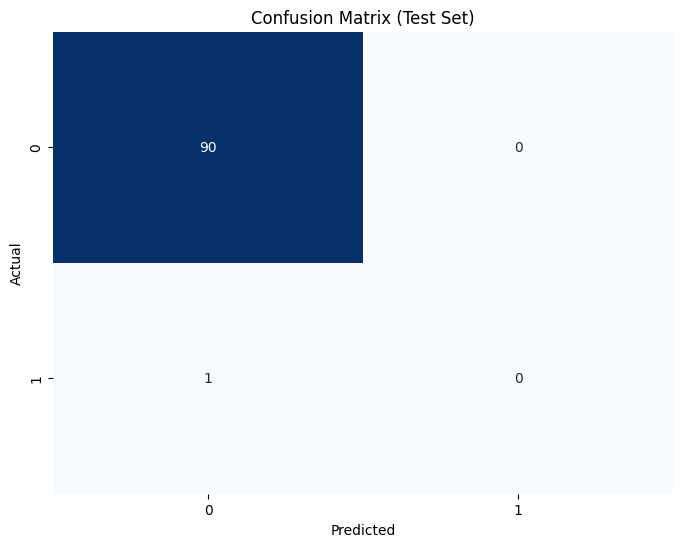

In [64]:
# Plot a confusion matrix for the test set
conf_matrix = confusion_matrix(Y_test, Y_test_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [65]:
# Create a classification report for the test set
class_report = classification_report(Y_test, Y_test_predict)
print("Classification Report (Test Set):\n", class_report)

Classification Report (Test Set):
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        90
         1.0       0.00      0.00      0.00         1

    accuracy                           0.99        91
   macro avg       0.49      0.50      0.50        91
weighted avg       0.98      0.99      0.98        91



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


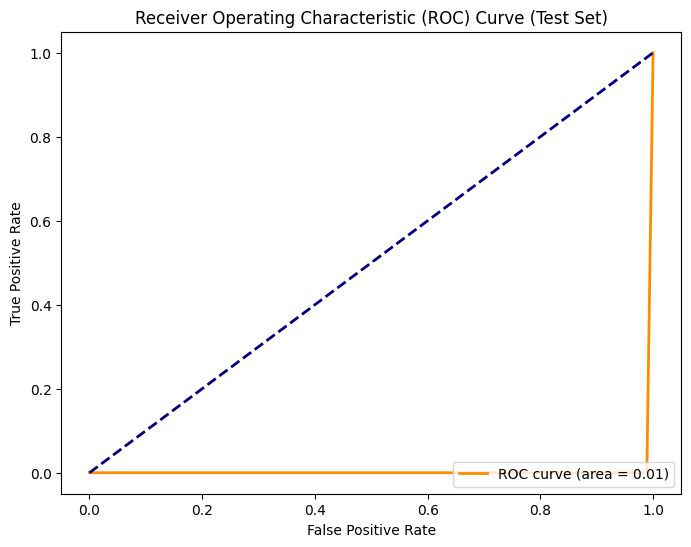

In [66]:
# Plot the Receiver Operating Characteristic (ROC) curve for the test set
Y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend(loc='lower right')
plt.show()

In [67]:
# accuracy on training data
from sklearn import metrics
X_train_prediction = model.predict(X_train)
training_data_accuracy = metrics.accuracy_score(X_train_prediction, Y_train)

In [68]:
print("Accuracy on Training data :", training_data_accuracy)

Accuracy on Training data : 0.996309963099631


In [69]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = metrics.accuracy_score(X_test_prediction, Y_test)

In [70]:
print("Accuracy on Test data :", test_data_accuracy)

Accuracy on Test data : 0.989010989010989


In [71]:
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegression

# Load your dataset and extract the "Amount" feature
# Replace this with your actual dataset loading and preprocessing

# Assuming you have a dataset with only the "Amount" feature
X = new_dataset[["Amount"]]
Y = new_dataset["Class"]

# Train a logistic regression model with the "Amount" feature
model = LogisticRegression()
model.fit(X, Y)

# Save the trained model to a file
joblib.dump(model, "logistic_regression_model_amount.pkl")

# Load the trained logistic regression model
model = joblib.load("logistic_regression_model_amount.pkl")

# Define a function to take user input for "Amount" and make predictions
def predict_fraud_amount(model):
    # Collect user input for the "Amount" feature
    amount = float(input("Enter the transaction amount: "))

    # Predict using the user input
    prediction = model.predict([[amount]])

    # Display the prediction
    if prediction == 1:
        print("The model predicts this as a FRAUDULENT transaction.")
    else:
        print("The model predicts this as a LEGITIMATE transaction.")

# Call the function to make predictions based on user input for "Amount"
predict_fraud_amount(model)

Enter the transaction amount: 15
The model predicts this as a LEGITIMATE transaction.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
